# Diamond Quality Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13,8)

In [28]:
df = pd.read_csv("./diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


### Carat
The carat weight measures the mass of a diamond. One carat is defined as 200 milligrams (about 0.007 ounce avoirdupois). The point unit—equal to one one-hundredth of a carat (0.01 carat, or 2 mg)—is commonly used for diamonds of less than one carat. All else being equal, the price per carat increases with carat weight, since larger diamonds are both rarer and more desirable for use as gemstones.

In [34]:
df.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

### Cut
Diamond cutting is the art and science of creating a gem-quality diamond out of mined rough. The cut of a diamond describes the manner in which a diamond has been shaped and polished from its beginning form as a rough stone to its final gem proportions. The cut of a diamond describes the quality of workmanship and the angles to which a diamond is cut. Often diamond cut is confused with "shape".

In [30]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

To perform any kind of visual exploration, we will need a numeric values for the cut categories. We need to create a new column with numeric values the cut categories

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["cut_num"] = encoder.fit_transform(df.cut)

In [40]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,2
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,3
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,1


### Colour
The finest quality as per color grading is totally colorless, which is graded as "D" color diamond across the globe, meaning it is absolutely free from any color. The next grade has a very slight trace of color, which can be observed by any expert diamond valuer/grading laboratory. However when studded in jewellery these very light colored diamonds do not show any color or it is not possible to make out color shades. These are graded as E color or F color diamonds.

![](./diamond-colors.png)

In [31]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

We need to convert values in color column to numeric values.

In [41]:
encoder = LabelEncoder()
df["color_num"] = encoder.fit_transform(df.color)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,2,1
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,3,1
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,1,1
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,3,5
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,1,6


What is the highest price of D colour diamonds?

In [42]:
df_D = df.loc[df['color'] == 'D']

In [43]:
df_D.sort_values(by='price', ascending=False, inplace=True)
df_D.head()

/home/init/code/intro-python-data-science/env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num
27676,2.19,Ideal,D,SI2,61.8,57,18693,8.23,8.49,5.17,2,0
27667,2.01,Ideal,D,SI2,62.1,56,18674,8.02,8.11,5.01,2,0
27647,2.11,Premium,D,SI2,60.9,60,18575,8.28,8.21,5.02,3,0
27635,1.04,Very Good,D,IF,61.3,56,18542,6.53,6.55,4.01,4,0
27627,2.14,Very Good,D,SI2,60.3,60,18526,8.31,8.43,5.05,4,0


## Visual Exploration

#### 1D
* carat
* price

#### 2D
* carat vs cut
* carat vs price
* carat vs color
* cut vs price
* cut vs color

#### 3D
* carat vs cut vs color
* carat vs cut vs price
* cut vs color vs price


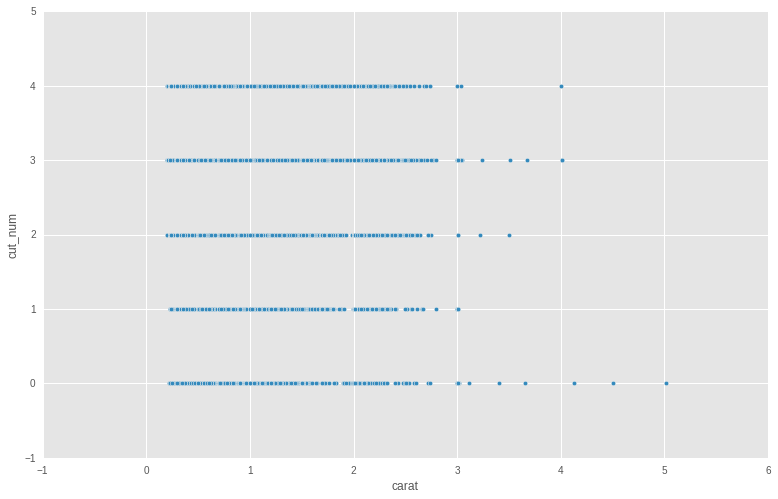

In [48]:
df.plot(x="carat", y="cut_num", kind="scatter")

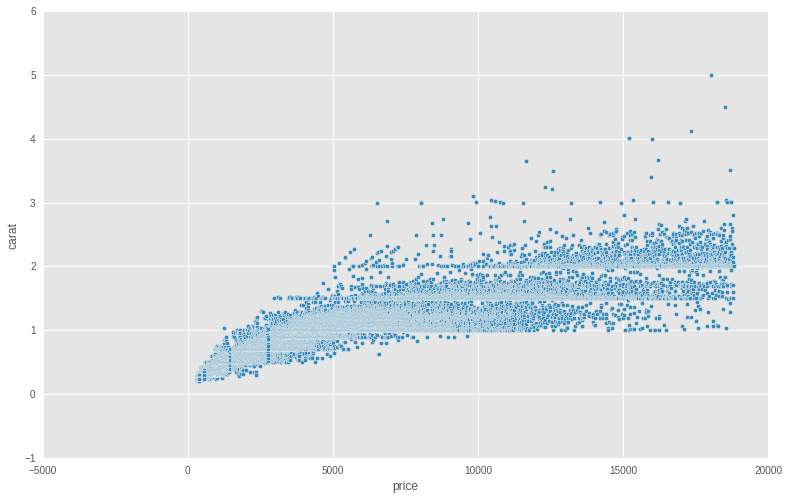

In [50]:
df.plot(x="price", y="carat", kind="scatter")

### Compare how the price change with respect to carat and colour of a diamond

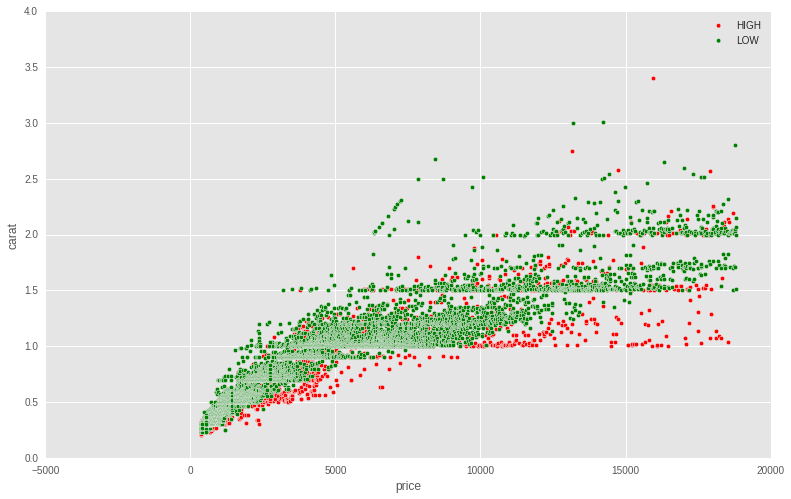

In [63]:
ax = df[df.color == 'D'].plot(x="price", y="carat", kind="scatter", color="red", label="HIGH")
df[df.color == 'G'].plot(x="price", y="carat", kind="scatter", color="green", label="LOW", ax=ax)

Compare more combination of columns to see the trend

#### Facet Grid

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f756a76c250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f756844d390>]], dtype=object)

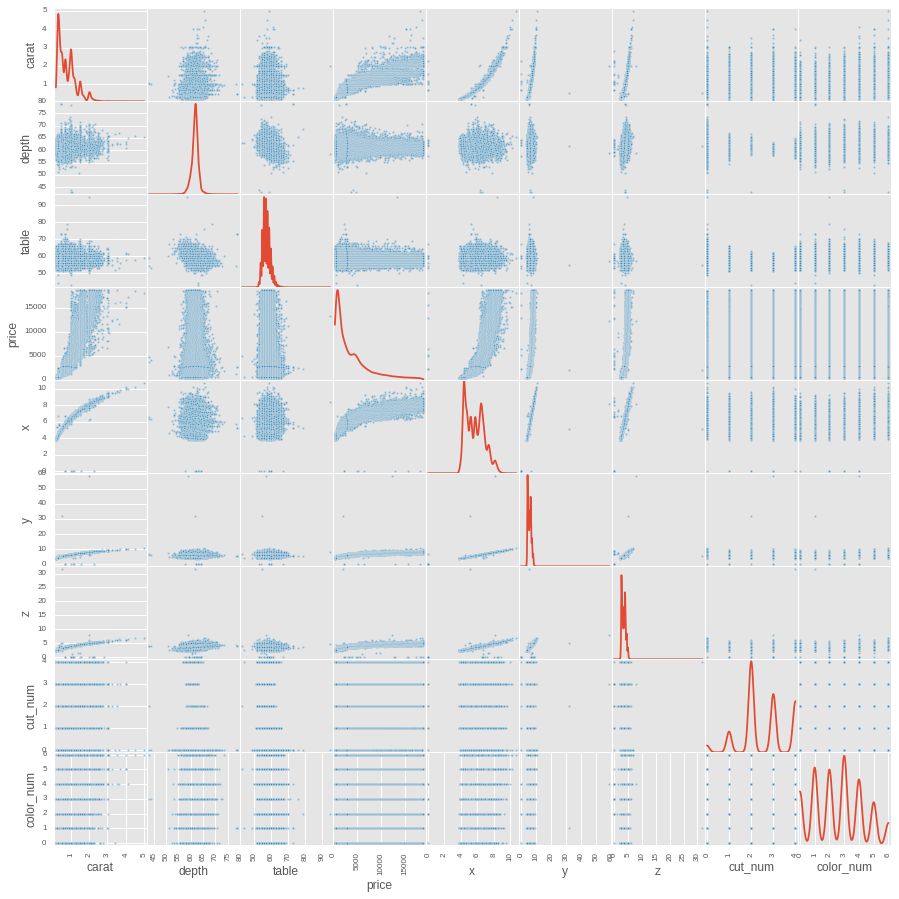

In [64]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, figsize=(15,15), diagonal='kde')

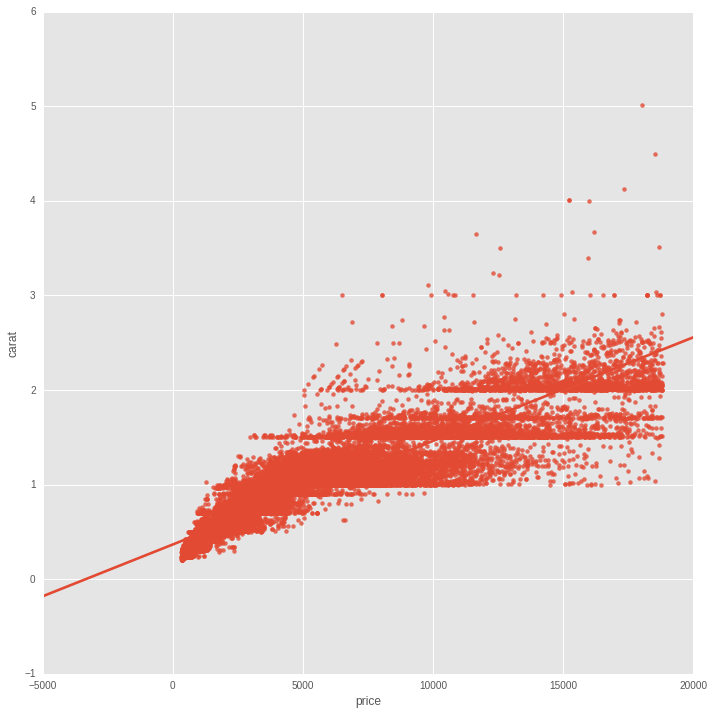

In [75]:
sns.lmplot(data=df, x="price", y="carat", size=10)

Try more lmplots for different columns

## Linear Regression
* 1 variable
* 2 or more variable